<a href="https://colab.research.google.com/github/Riyathakur0611/ML-projects/blob/main/Labsheet_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LABSHEET 10

Build a digit classifier(0-9) using MLP with sklearn or pyTorch

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.9619285714285715


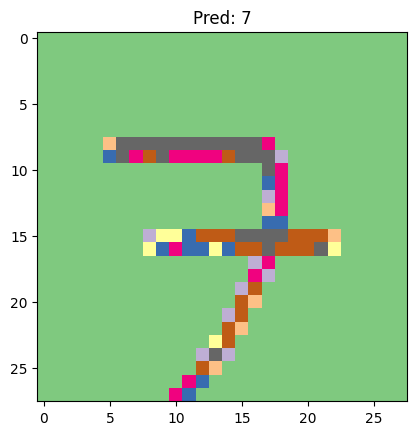

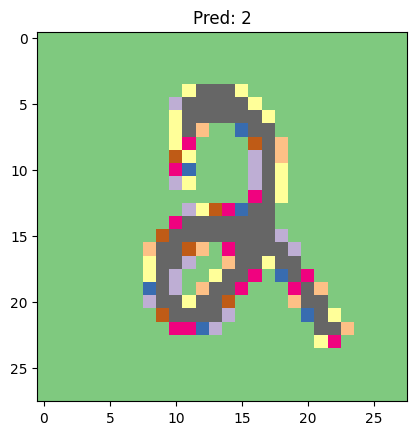

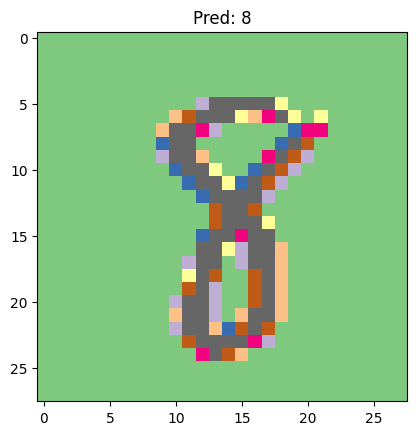

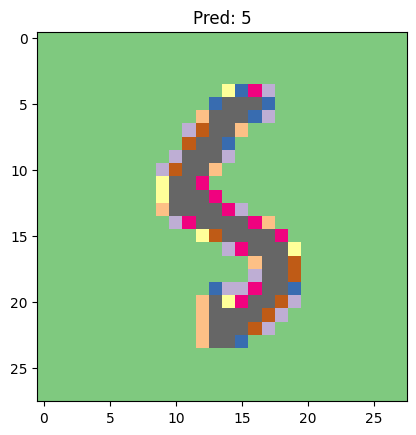

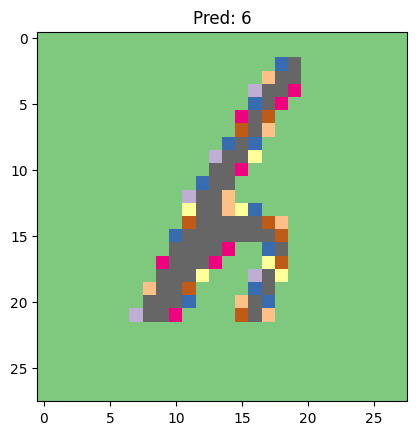

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20)
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Accuracy
print("MLP Accuracy:", accuracy_score(y_test, y_pred))

# Display sample predictions
for i in range(5):
    plt.imshow(X_test.iloc[i].values.reshape(28,28), cmap="Accent")
    plt.title(f"Pred: {y_pred[i]}")
    plt.show()


Trains a neural network to approximate the function sin(x) over the interval ([0,
2pi])

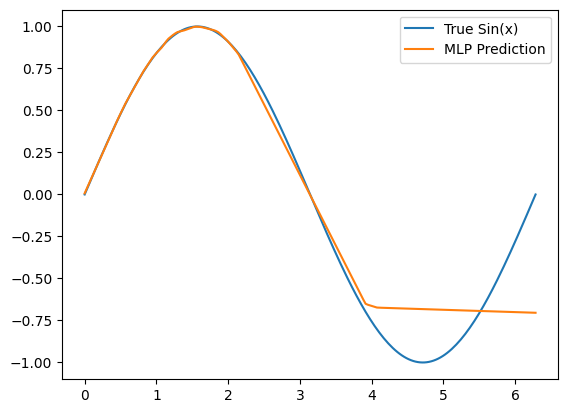

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Generate data
X = np.linspace(0, 2*np.pi, 200).reshape(-1, 1)
y = np.sin(X)

# Train MLP
model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=5000)
model.fit(X, y.ravel())

# Predict
y_pred = model.predict(X)

# Plot
plt.plot(X, y, label='True Sin(x)')
plt.plot(X, y_pred, label='MLP Prediction')
plt.legend()
plt.show()


Implements a recurrent Hopfield model capable of recognizing simple temporal
patterns.

In [3]:
import numpy as np

class HopfieldNet:
    def __init__(self, size):
        self.size = size
        self.W = np.zeros((size, size))

    def train(self, patterns):
        for p in patterns:
            p = p.reshape(-1, 1)
            self.W += p @ p.T
        np.fill_diagonal(self.W, 0)

    def recall(self, pattern, steps=5):
        x = pattern.copy()
        for _ in range(steps):
            x = np.sign(self.W @ x)
        return x

# Encode sequences
pattern1 = np.array([1, -1, 1, -1])
pattern2 = np.array([-1, 1, -1, 1])

net = HopfieldNet(4)
net.train([pattern1, pattern2])

# Noisy input
test = np.array([1, -1, -1, -1])

# Recall
out = net.recall(test)
print("Recalled Pattern:", out)


Recalled Pattern: [ 1. -1.  1. -1.]


Compares an MLP classifier with an SVM using metrics such as accuracy,
F1-score, and ROC curves.

MLP Accuracy: 0.9666666666666667
SVM Accuracy: 0.9916666666666667
MLP F1: 0.9666666666666667
SVM F1: 0.9916666666666667


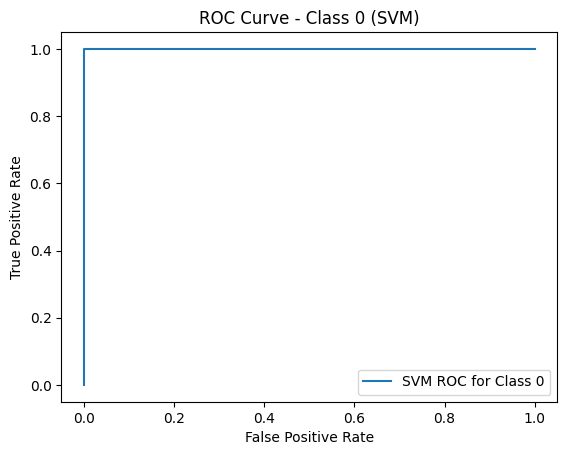

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target
y_bin = label_binarize(y, classes=list(range(10)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

# SVM (probability for ROC)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Metrics
print("MLP Accuracy:", accuracy_score(y_test, mlp_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("MLP F1:", f1_score(y_test, mlp_pred, average="micro"))
print("SVM F1:", f1_score(y_test, svm_pred, average="micro"))

# ROC Curve (for one class)
from sklearn.preprocessing import label_binarize

# Binarize ONLY test labels
y_test_bin = label_binarize(y_test, classes=list(range(10)))

# ROC Curve for class '0'
svm_prob = svm.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test_bin[:, 0], svm_prob[:, 0])

plt.plot(fpr, tpr, label="SVM ROC for Class 0")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Class 0 (SVM)")
plt.legend()
plt.show()


Performs feature extraction from raw images and feeds extracted features into a
shallow neural network for classification.


In [6]:
from skimage.feature import hog
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load digits dataset (8x8)
digits = load_digits()
X, y = digits.images, digits.target

# Extract HOG features
hog_features = []
for img in X:
    hog_feat = hog(img, pixels_per_cell=(4,4), cells_per_block=(1,1))
    hog_features.append(hog_feat)

hog_features = np.array(hog_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(hog_features, y, test_size=0.2)

# Shallow neural network
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Accuracy with HOG + Shallow NN:", accuracy_score(y_test, y_pred))


Accuracy with HOG + Shallow NN: 0.8277777777777777


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
